In [21]:
import pandas as pd
import numpy as np
import missingno #package used for visualising missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt ## matplotlib used for visualization
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import math
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [22]:
#import data

df = pd.read_csv(r"C:\Users\User\Documents\Machine learning - House price prediction from Kaggle\train.csv")

In [23]:
df.describe().transpose().style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
def lot_area(row):
    area = row['LotArea']
    
    if area <= 2000:
        return '<2000'
    elif area <= 4000:
        return '<4000'
    elif area <= 6000:
        return '<6000'
    elif area <= 8000:
        return '<8000'
    elif area <=10000:
        return '<10000'
    elif area <= 15000:
        return '<15000'
    elif area <= 20000:
        return '<20000'
    elif area <= 50000:
        return '<50000'
    elif area <= 100000:
        return '<100000'
    elif area <= 125000:
        return '<125000'
    elif area <= 150000:
        return '<150000'
    else:
        return '>150000'
    
df['Lot Size Desc'] = df.apply(lot_area, axis=1)

In [26]:
X= df['Lot Size Desc']
y =df['SalePrice']

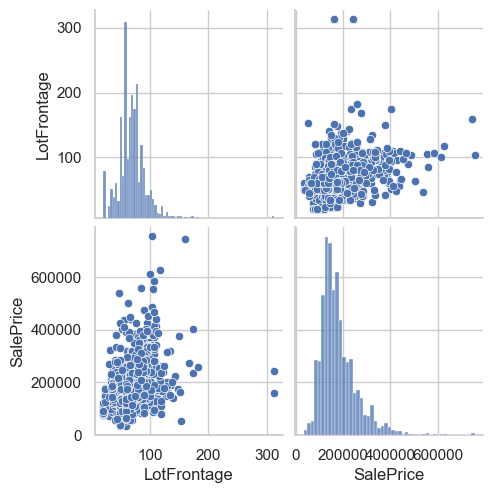

In [27]:
var_num = ['Lot Size Desc','LotFrontage','SalePrice']
ax = sns.pairplot(df[var_num])
plt.show()

In [28]:
df['LotFrontage'].mean()

70.04995836802665

In [29]:
#percentage of data missing in lot Frontage
df['LotFrontage'].isnull().sum()/len(df)*100

17.73972602739726

In [30]:
df['LotFrontage']= df['LotFrontage'].fillna('70.0').apply(pd.to_numeric)

In [31]:
categorical_features = list(df.select_dtypes(include =[object]).columns)
numerical_features = list(df.select_dtypes(include =np.number).columns)

print(categorical_features)

print ('/n')

print(numerical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Lot Size Desc']
/n
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckS

In [32]:
df[categorical_features].fillna('NA',inplace= True)

In [33]:
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [34]:
pd.options.display.float_format = "{:,.2f}".format

In [35]:
df[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.00,7917,6,5,1999,2000,0.00,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.00,13175,6,6,1978,1988,119.00,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.00,9042,7,9,1941,2006,0.00,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.00,9717,5,6,1950,1996,0.00,49,...,366,0,112,0,0,0,0,4,2010,142125


#### Correlation
The values 1 and -1 both represent "perfect" correlations, positive and negative respectively. Two perfectly correlated variables change together at a fixed rate. We say they have a linear relationship; when plotted on a scatterplot, all data points can be connected with a straight line.

#### CORRELATION HEATMAP

In [36]:
corr_matrix = df[numerical_features].corr()

In [37]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,...,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.36,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.36,1.00,0.31,0.23,-0.05,0.12,0.08,0.18,0.22,...,0.08,0.14,0.01,0.06,0.04,0.18,0.00,0.01,0.01,0.33
LotArea,-0.03,-0.14,0.31,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.23,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.05,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.13,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.18,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,...,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.22,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


### PLOT IN SEABORN

Text(0.5, 1.0, 'House Sale Price Correlation')

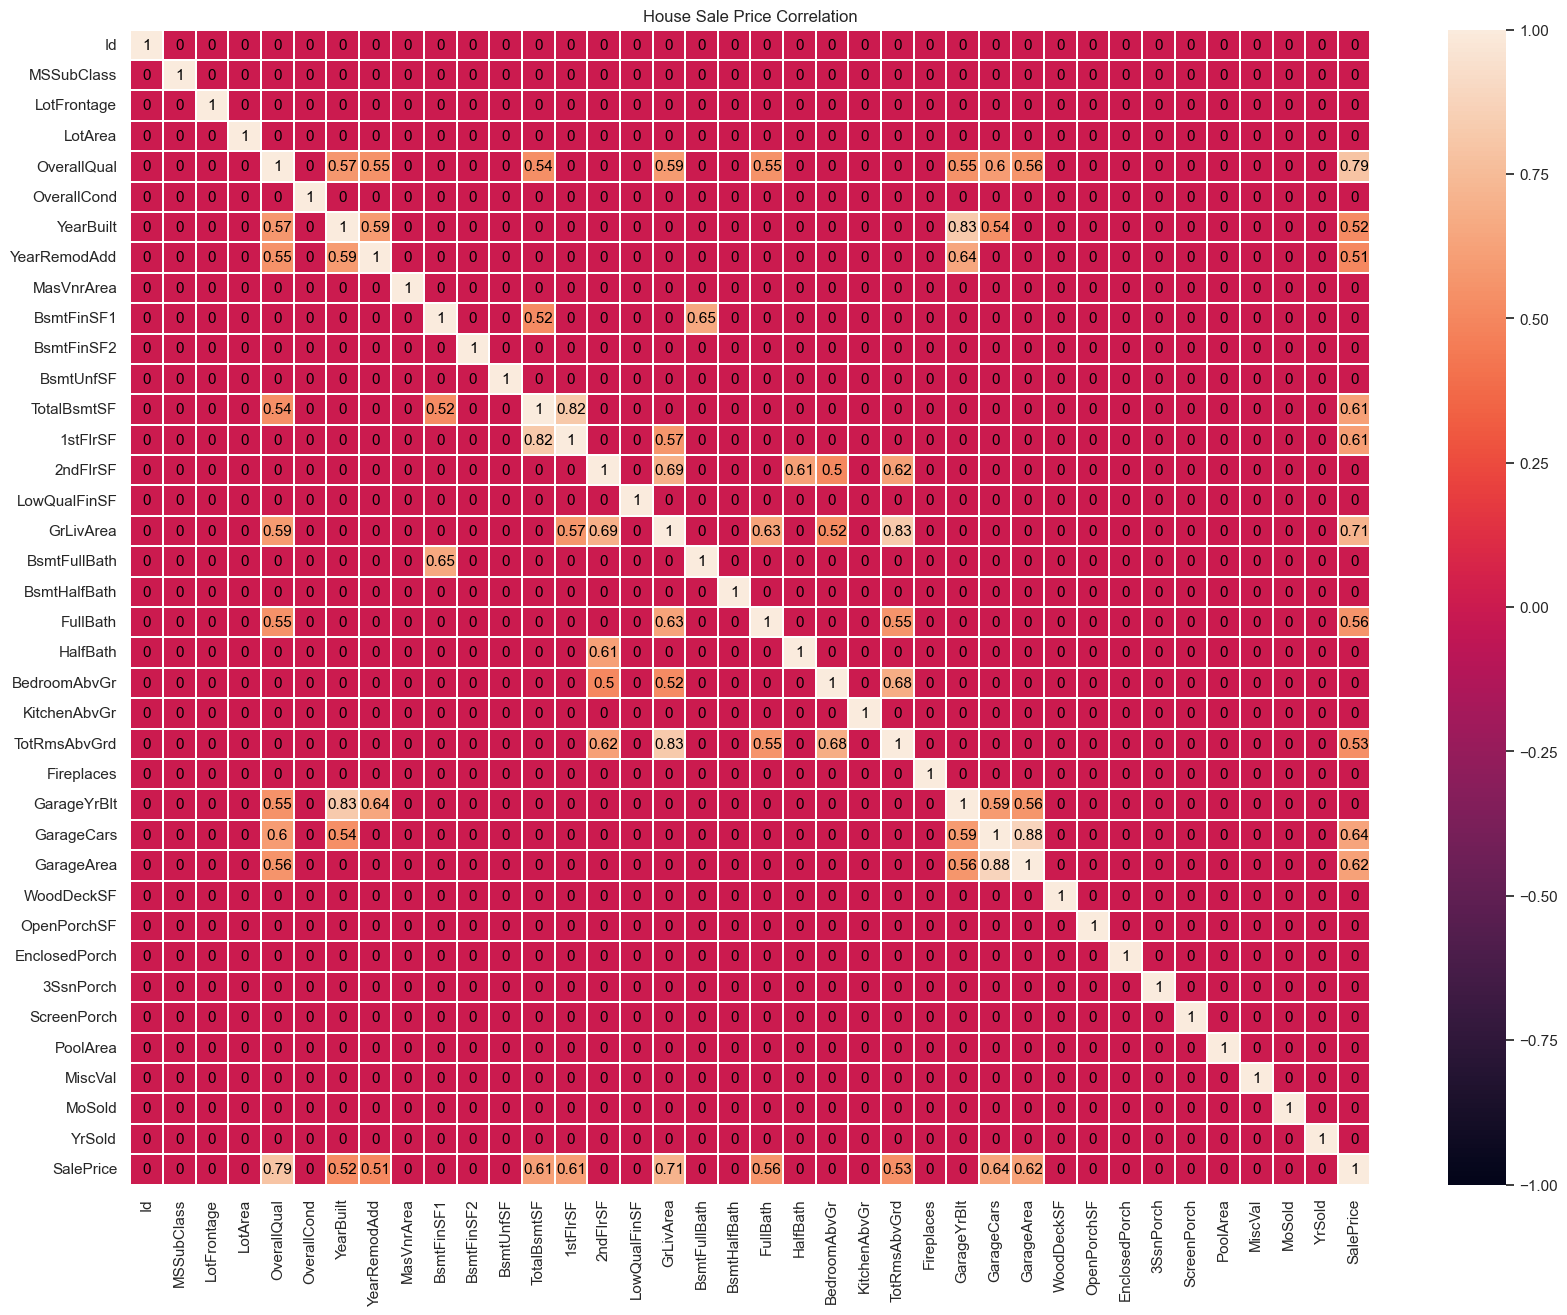

In [38]:
corr_matrix[(corr_matrix< 0.5) & (corr_matrix> -0.5)]=0#remove corr less than 0.5 and -0.5 for more visibility

sns.heatmap(corr_matrix, vmax =1.0, vmin =-1.0, linewidths=0.1, annot_kws= {'size':11, "color": 'black'}, annot= True)#vmax and vmin represent the same data values on the axis hence labelled as 1

plt.title('House Sale Price Correlation')

# The features with higher correlation to house sale price are 'Overall Quality' @ 0.79 and 'Ground Living Area' @ 0.71

Based on the training set lot frontage (land area) did not show a high degree of correlation with the sale value

#### SELECT THE FEATURES/COLUMNS WITH HIGHER POSITIVE CORRELATION

In [39]:
corr =df.corr()['SalePrice'].sort_values(ascending= False)[1:]

In [40]:
corr = corr[['OverallQual','GrLivArea']]

In [41]:
#Feature selection variable:
corr

OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64